In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [2]:
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
%whos

Variable   Type         Data/Info
---------------------------------
data       DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


In [4]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
from sklearn.preprocessing import Normalizer
wine_nom = Normalizer()
norm_data = wine_nom.fit_transform(data)


In [8]:
norm_data.shape

(178, 13)

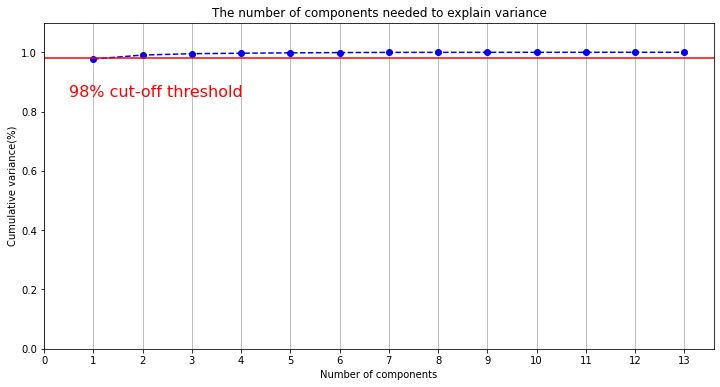

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(norm_data)
plt.rcParams['figure.figsize']=(12,6)

fig,ax =plt.subplots()
xi= np.arange(1,14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi,y,marker ='o',linestyle='--',color ='b')

plt.xlabel('Number of components')
plt.xticks(np.arange(0,14,step=1))
plt.ylabel('Cumulative variance(%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.98,color='r',linestyle='-')
plt.text(0.5,0.85,'98% cut-off threshold',color='red',fontsize=16)

ax.grid(axis='x')
plt.show()


In [10]:
pca = PCA(n_components = 2)
pca.fit(norm_data)
x_pca = pca.transform(norm_data)
x_pca.shape

(178, 2)

# 2. Try out different clustering models in the wine dataset.

# KMeans Clustering

C:\hp\anaconda3\envs\ipykernel_py3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5839029159896649
0.20550996003429173
0.09828374816946706
0.05442686715569596
0.035136209749901226
0.026813775709679733
0.02226801950707856
0.019105331663429773
0.01619338490984483
0.014517259357182191


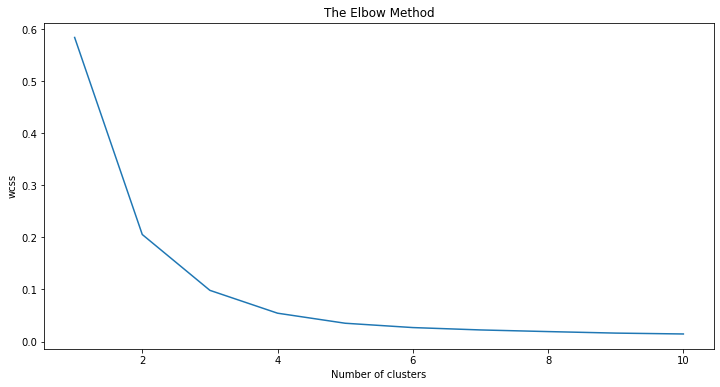

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Optimum number of clusters are 3

# 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(x_pca)
type(x_pca)
y_kmeans

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

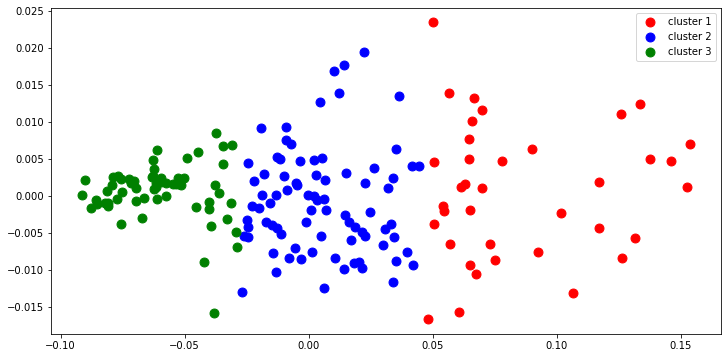

In [13]:
plt.scatter(x_pca[y_kmeans == 0,0], x_pca[y_kmeans == 0,1], s = 80, c='red',label = 'cluster 1')
plt.scatter(x_pca[y_kmeans == 1,0], x_pca[y_kmeans == 1,1], s = 80, c='blue',label = 'cluster 2')
plt.scatter(x_pca[y_kmeans == 2,0], x_pca[y_kmeans == 2,1], s = 80, c='green',label = 'cluster 3')
plt.legend()
plt.show()

# Agglomerative Hierarchial clustering

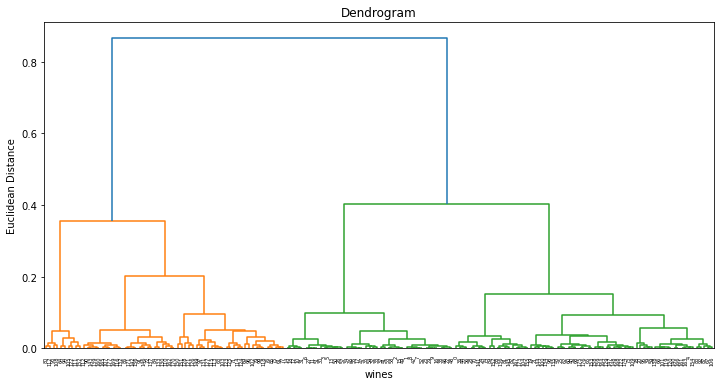

In [14]:
#using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram =sch.dendrogram(sch.linkage(x_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('wines')
plt.ylabel('Euclidean Distance')
plt.show()

Optimum number of clusters is 2

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x_pca)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1], dtype=int64)

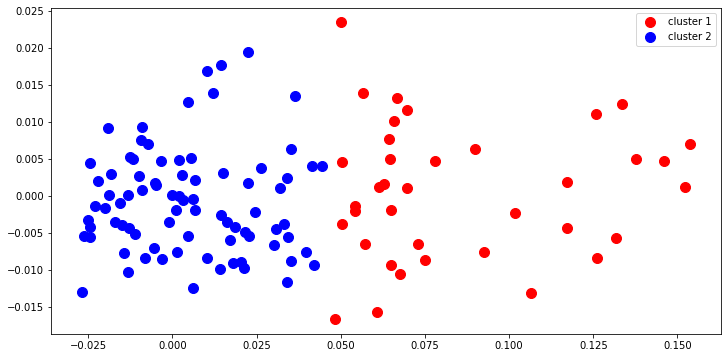

In [16]:
plt.scatter(x_pca[y_kmeans == 0,0], x_pca[y_kmeans == 0,1], s = 100, c='red',label = 'cluster 1')
plt.scatter(x_pca[y_kmeans == 1,0], x_pca[y_kmeans == 1,1], s = 100, c='blue',label = 'cluster 2')
plt.legend()
plt.show()

In [17]:
#Silhouette score of kmeans clustering
from sklearn.metrics import silhouette_score
silhouette_avg1 = silhouette_score(x_pca , y_kmeans)
print(silhouette_avg1)

0.5378513797000178


In [18]:
#Silhouette score of ahc clustering
silhouette_avg2 = silhouette_score(x_pca , y_hc)
print(silhouette_avg2)

0.5461320282173209
